#### Imports

In [1]:
import pandas as pd
from Perceptron import *
from PerceptronLayer import *
from PerceptronNetwork import *


#### Maken van een waarheidstabel

In [2]:
def create_table_data(function, expectation):
    """Deze functie berekent de uitkomst van een perceptron/netwerk, Als input gebruikt hij de door mij gegeven data
    en haalt daar de uitkomst vanaf (zodat de inputs hetzelfde zijn)"""
    data = []
    
    for item in expectation:
        row = item[:len(expectation[0])-1]
        row.append(function(row))
        data.append(row)
    return data

In [3]:
def print_table(data, caption):
    """Deze functie print een waarheidstabel"""
    number_of_columns = len(data[0])  # Aantal kolommen
    
    columns = []
    for item in range(number_of_columns):
        if item == number_of_columns-1:
            columns.append('Output')
        else: 
            columns.append('x'+str(item+1))

    df = pd.DataFrame.from_records(data, columns=columns)
    print(f'<{caption}>\n {df}\n')

#### Uitkomsten testen

In [4]:
def test_outcome(expectation, outcome):
    """Deze functie test of de uitkomst van een perceptron/netwerk hetzelfde is als de verwachting.
    Ik heb gekozen om dit op deze 'assert' manier te doen omdat deze functie nu makkelijk en flexibel aan te roepen is.
    """
    assert expectation == outcome, 'Test mislukt - Verwachting & uitkomst niet hetzelfde'
    print("Test geslaagd - Verwachting & uitkomst hetzelfde")

## Perceptron unit

#### NOT

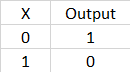

In [5]:
"""Invert Test"""
p_not = Perceptron('NOT', 0.5, [-1])
print(p_not)

not_expectation = [[False, True], [True, False]]
not_outcome = create_table_data(p_not.activation, not_expectation)

print_table(not_expectation, 'Verwachting')
print_table(not_outcome,'Uitkomst')

test_outcome(not_expectation, not_outcome)


<NOT port>
- Bias = 0.5
- Weights = [-1]

<Verwachting>
       x1  Output
0  False    True
1   True   False

<Uitkomst>
       x1  Output
0  False    True
1   True   False

Test geslaagd - Verwachting & uitkomst hetzelfde


In [6]:
"""Om te laten zien wat er gebeurt als de verwachting en uikomst niet hetzelfde zijn 
zal ik 1 keer een falende test aanroepen."""

test_outcome([[False, True], [False, False]], not_outcome)


AssertionError: Test mislukt - Verwachting & uitkomst niet hetzelfde

#### AND
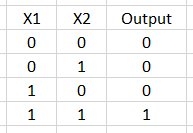


In [ ]:
"""AND Test"""

p_and = Perceptron('AND', -1.5, [1, 1])
print(p_and)

and_expectation = [[False, False, False], 
                   [False, True, False], 
                   [True, False, False], 
                   [True, True, True]]

and_outcome = create_table_data(p_and.activation, and_expectation)

print_table(and_expectation, 'Verwachting')
print_table(and_outcome,'Uitkomst')

test_outcome(and_expectation, and_outcome)


#### OR
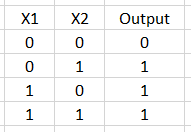

In [ ]:
"""OR Test"""

p_or = Perceptron('OR', -0.5, [0.5, 0.5])
print(p_or)

or_expectation = [[False, False, False], 
                   [False, True, True], 
                   [True, False, True], 
                   [True, True, True]]
or_outcome = create_table_data(p_or.activation, or_expectation)

print_table(or_expectation, 'Verwachting')
print_table(or_outcome,'Uitkomst')

test_outcome(or_expectation, or_outcome)

#### Nor
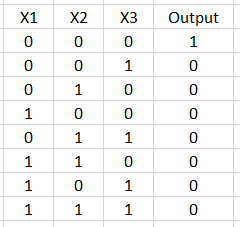



In [ ]:
"""NOR Test"""

p_nor = Perceptron('NOR', 0, [-1, -1, -1])
print(p_nor)

nor_expectation = [[False, False, False, True], 
                   [False, False, True, False], 
                   [False, True, False, False], 
                   [True, False, False, False],
                   [False, True, True, False], 
                   [True, True, False, False],
                   [True, False, True, False], 
                   [True, True, True, False]]
nor_outcome = create_table_data(p_nor.activation, nor_expectation)

print_table(nor_expectation, 'Verwachting')
print_table(nor_outcome,'Uitkomst')

test_outcome(nor_expectation, nor_outcome)

#### Party

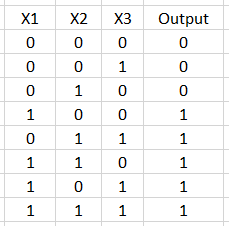


In [ ]:
"""Party Test"""

p_party = Perceptron('PARTY', -0.4, [0.6, 0.3, 0.2])
print(p_party)

party_expectation = [[False, False, False, False], 
                   [False, False, True, False], 
                   [False, True, False, False], 
                   [True, False, False, True],
                   [False, True, True, True], 
                   [True, True, False, True],
                   [True, False, True, True], 
                   [True, True, True, True]]
party_outcome = create_table_data(p_party.activation, party_expectation)

print_table(party_expectation, 'Verwachting')
print_table(party_outcome,'Uitkomst')

test_outcome(party_expectation, party_outcome)

## Perceptron netwerk

#### XOR
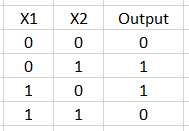

In [ ]:
p1 = Perceptron('P1 [AND]', -1, [0.5, 0.5])
p2 = Perceptron('P2 [OR]', -1, [1, 1])
p3 = Perceptron('P2 [XOR]', -1, [-1, 1])

layer1 = PerceptronLayer('Laag-1 [Hidden]', [p1, p2])
layer2 = PerceptronLayer('Laag-2 [Output]', [p3])

network_xor = PerceptronNetwork([layer1, layer2])
print(network_xor)
    
xor_expectation = [[False, False, False], 
                   [False, True, True], 
                   [True, False, True], 
                   [True, True, False]]

xor_outcome = create_table_data(network_xor.feed_forward, xor_expectation)

print_table(xor_expectation, 'Verwachting')
print_table(xor_outcome,'Uitkomst')

test_outcome(xor_expectation, xor_outcome)
    
 

#### Half-adder
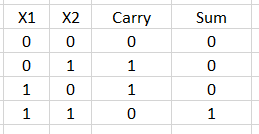

In [ ]:
# Laag 1
p1 = Perceptron('P1', -1, [1, 0])
p2 = Perceptron('NAND', 1.5, [-1, -1])
p3 = Perceptron('P3', -1, [0, 1])
layer1 = PerceptronLayer('Layer-1 [Hidden]', [p1, p2, p3])

# Laag 2
p4 = Perceptron('NAND', 1.5, [-1, -1, 0])
p5 = Perceptron('NAND', 1.5, [0, -1, -1])
p6 = Perceptron('P9', -1, [0, 1, 0])
layer2 = PerceptronLayer('Layer-2 [Hidden]', [p4, p5, p6])

# Laag 3
p7 = Perceptron('SUM [NAND]', 1.5, [-1, -1, 0])
p8 = Perceptron('CARRY [NAND]', 1.5, [0, 0, -2])
layer3 = PerceptronLayer('Layer-3 [Hidden]', [p7, p8])

network_adder = PerceptronNetwork([layer1, layer2, layer3])
print(network_adder)
    
adder_expectation = [[False, False, [False, False]], 
                   [False, True, [True, False]], 
                   [True, False, [True, False]], 
                   [True, True, [False, True]]]

adder_outcome = create_table_data(network_adder.feed_forward, adder_expectation)

print_table(adder_expectation, 'Verwachting')
print_table(adder_outcome,'Uitkomst')

test_outcome(adder_expectation, adder_outcome)


"""De output is een beetje raar, dit is [Carry, Sum] Dit fixen was onnodig veel werk omdat het alleen maar is
om het te laten zien/bewijzen"""